In [109]:
import pandas as pd
import os
import datetime as dt
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import matplotlib.dates
import matplotlib.dates as mdates
import seaborn as sns

In [110]:
with open("master_df.csv", "r") as f:
    master_df = pd.read_csv(f)

In [111]:
master_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year,delivery_duration,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,category_name,seller_zip_code_prefix,seller_city,seller_state,seller_city_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33.000000000,2017-10-02 11:07:15.000000000,2017-10-04 19:55:00.000000000,2017-10-10 21:25:13.000000000,2017-10-18 00:00:00.000000000,2017-10,6 days 01:30:13,...,4.0,500.0,19.0,8.0,13.0,Housewares,9350,Maua,SP,"Maua, SP"
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33.000000000,2017-10-02 11:07:15.000000000,2017-10-04 19:55:00.000000000,2017-10-10 21:25:13.000000000,2017-10-18 00:00:00.000000000,2017-10,6 days 01:30:13,...,4.0,500.0,19.0,8.0,13.0,Housewares,9350,Maua,SP,"Maua, SP"
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33.000000000,2017-10-02 11:07:15.000000000,2017-10-04 19:55:00.000000000,2017-10-10 21:25:13.000000000,2017-10-18 00:00:00.000000000,2017-10,6 days 01:30:13,...,4.0,500.0,19.0,8.0,13.0,Housewares,9350,Maua,SP,"Maua, SP"
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31.000000000,2017-08-15 20:05:16.000000000,2017-08-17 15:28:33.000000000,2017-08-18 14:44:43.000000000,2017-08-28 00:00:00.000000000,2017-08,0 days 23:16:10,...,4.0,500.0,19.0,8.0,13.0,Housewares,9350,Maua,SP,"Maua, SP"
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47.000000000,2017-08-02 18:43:15.000000000,2017-08-04 17:35:43.000000000,2017-08-07 18:30:01.000000000,2017-08-15 00:00:00.000000000,2017-08,3 days 00:54:18,...,4.0,500.0,19.0,8.0,13.0,Housewares,9350,Maua,SP,"Maua, SP"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115815,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,2018-07,5 days 00:32:57,...,2.0,750.0,30.0,28.0,28.0,Construction_Tools_Lights,13660,Porto Ferreira,SP,"Porto Ferreira, SP"
115816,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaN,NaN,2017-03-30 00:00:00,2017-03,NaN,...,2.0,400.0,16.0,4.0,11.0,Auto,89031,Blumenau,SC,"Blumenau, SC"
115817,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,2018-07,9 days 07:33:35,...,2.0,2100.0,80.0,8.0,30.0,Furniture_Decor,13478,Americana,SP,"Americana, SP"
115818,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29,2018-06-08 00:00:00,2018-05,19 days 10:43:29,...,1.0,5900.0,41.0,21.0,41.0,Furniture_Decor,8320,Sao Paulo,SP,"Sao Paulo, SP"


In [112]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115820 entries, 0 to 115819
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   order_id                        115820 non-null  object 
 1   customer_id                     115820 non-null  object 
 2   order_status                    115820 non-null  object 
 3   order_purchase_timestamp        115820 non-null  object 
 4   order_approved                  115820 non-null  object 
 5   delivered_to_carrier            114617 non-null  object 
 6   delivered_to_customer           113333 non-null  object 
 7   estimated_delivery_to_customer  115820 non-null  object 
 8   order_month_year                115820 non-null  object 
 9   delivery_duration               113333 non-null  object 
 10  delivery_hours                  113333 non-null  float64
 11  payment_sequential              115820 non-null  int64  
 12  payment_type    

In [113]:
master_df['order_purchase_timestamp'] = pd.to_datetime(master_df['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
master_df['order_approved'] = pd.to_datetime(master_df['order_approved'], format='%Y-%m-%d %H:%M:%S')
master_df['delivered_to_carrier'] = pd.to_datetime(master_df['delivered_to_carrier'], format='%Y-%m-%d %H:%M:%S')
master_df['delivered_to_customer'] = pd.to_datetime(master_df['delivered_to_customer'], format='%Y-%m-%d %H:%M:%S')
master_df['estimated_delivery_to_customer'] = pd.to_datetime(master_df['estimated_delivery_to_customer'], format='%Y-%m-%d %H:%M:%S')
master_df['order_month_year'] = master_df['order_purchase_timestamp'].dt.to_period('M')

In [114]:
master_df['delivery_duration'] = (master_df['delivered_to_customer'] - master_df['delivered_to_carrier'])
master_df['delivery_hours'] = master_df['delivery_duration']/dt.timedelta(hours=1)

In [115]:
master_df['delivery_days'] = master_df['delivery_duration']/dt.timedelta(days=1)

In [116]:
null_days = master_df[master_df['delivery_days'].isna()]
null_days

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year,delivery_duration,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,category_name,seller_zip_code_prefix,seller_city,seller_state,seller_city_state,delivery_days
171,1b1d6a3f8e1369c613eb19c40dab5624,e8c7b1e1584d6ba2f13473ac8e3e7cbe,shipped,2018-03-13 20:56:03,2018-03-13 21:10:31,2018-03-14 20:03:34,NaT,2018-04-04,2018-03,NaT,...,570.0,19.0,13.0,17.0,Perfumery,31570,Belo Horizonte,SP,"Belo Horizonte, SP",NaN
234,3a53d5a9a0c58d291ff3ae407b6df5fd,5612aa60cdbbd8e9d89ae0c409080375,shipped,2018-02-16 21:55:03,2018-02-17 01:26:58,2018-02-19 16:14:14,NaT,2018-03-14,2018-02,NaT,...,400.0,19.0,13.0,19.0,Perfumery,24451,Sao Goncalo,RJ,"Sao Goncalo, RJ",NaN
341,72c501775cf36e99076132aaee5ae9c0,6cc8f025e1b94225a79f478d3bcba65c,shipped,2017-12-01 12:39:39,2017-12-02 02:37:10,2017-12-04 20:39:56,NaT,2017-12-19,2017-12,NaT,...,400.0,19.0,13.0,19.0,Perfumery,9020,Santo Andre,SP,"Santo Andre, SP",NaN
449,37726a8b1cbcf77034870df2521be6f6,2976ca9e434924142eca1be125f4653b,shipped,2018-03-07 10:06:01,2018-03-07 10:15:51,2018-03-08 18:17:02,NaT,2018-03-28,2018-03,NaT,...,342.0,18.0,13.0,15.0,Watches_Gifts,14840,Guariba,SP,"Guariba, SP",NaN
495,75687059537f4b53423dc1d645c6822f,239e040dfb9ecf20be36947bbea5fa0f,shipped,2018-02-28 21:28:33,2018-02-28 21:48:26,2018-03-03 00:05:26,NaT,2018-03-19,2018-02,NaT,...,342.0,18.0,13.0,15.0,Watches_Gifts,14840,Guariba,SP,"Guariba, SP",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115801,8505d7267ce3f58c129ffa8468cebf21,af81a8c415a28b1ba710741f8e2562fe,processing,2017-02-15 23:00:16,2017-02-15 23:10:12,NaT,NaT,2017-04-04,2017-02,NaT,...,1700.0,33.0,12.0,33.0,Bed_Bath_Table,2372,Sao Paulo,SP,"Sao Paulo, SP",NaN
115810,f5f8998eee8ec7bc513dc52847d64ce0,f4656b824844a039a87fd9c51ad3586a,canceled,2018-03-01 11:42:23,2018-03-01 12:20:32,NaT,NaT,2018-03-20,2018-03,NaT,...,3500.0,20.0,20.0,20.0,Furniture_Decor,13632,Pirassununga,SP,"Pirassununga, SP",NaN
115813,5a8a4dc28b16fb90469ad749f9535773,c0c8b8bb055100a0cc08dcc04d847ac9,canceled,2018-03-13 10:58:09,2018-03-14 03:08:35,NaT,NaT,2018-03-23,2018-03,NaT,...,1700.0,30.0,5.0,30.0,Garden_Tools,3658,Sao Paulo,SP,"Sao Paulo, SP",NaN
115814,5a8a4dc28b16fb90469ad749f9535773,c0c8b8bb055100a0cc08dcc04d847ac9,canceled,2018-03-13 10:58:09,2018-03-14 03:08:35,NaT,NaT,2018-03-23,2018-03,NaT,...,1700.0,30.0,5.0,30.0,Garden_Tools,3658,Sao Paulo,SP,"Sao Paulo, SP",NaN


In [117]:
master_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year,delivery_duration,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,category_name,seller_zip_code_prefix,seller_city,seller_state,seller_city_state,delivery_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,6 days 01:30:13,...,500.0,19.0,8.0,13.0,Housewares,9350,Maua,SP,"Maua, SP",6.062650
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,6 days 01:30:13,...,500.0,19.0,8.0,13.0,Housewares,9350,Maua,SP,"Maua, SP",6.062650
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,6 days 01:30:13,...,500.0,19.0,8.0,13.0,Housewares,9350,Maua,SP,"Maua, SP",6.062650
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,2017-08,0 days 23:16:10,...,500.0,19.0,8.0,13.0,Housewares,9350,Maua,SP,"Maua, SP",0.969560
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,2017-08,3 days 00:54:18,...,500.0,19.0,8.0,13.0,Housewares,9350,Maua,SP,"Maua, SP",3.037708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115815,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20,2018-07,5 days 00:32:57,...,750.0,30.0,28.0,28.0,Construction_Tools_Lights,13660,Porto Ferreira,SP,"Porto Ferreira, SP",5.022882
115816,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaT,NaT,2017-03-30,2017-03,NaT,...,400.0,16.0,4.0,11.0,Auto,89031,Blumenau,SC,"Blumenau, SC",NaN
115817,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16,2018-07,9 days 07:33:35,...,2100.0,80.0,8.0,30.0,Furniture_Decor,13478,Americana,SP,"Americana, SP",9.314988
115818,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29,2018-06-08,2018-05,19 days 10:43:29,...,5900.0,41.0,21.0,41.0,Furniture_Decor,8320,Sao Paulo,SP,"Sao Paulo, SP",19.446863


In [118]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115820 entries, 0 to 115819
Data columns (total 40 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   order_id                        115820 non-null  object         
 1   customer_id                     115820 non-null  object         
 2   order_status                    115820 non-null  object         
 3   order_purchase_timestamp        115820 non-null  datetime64[ns] 
 4   order_approved                  115820 non-null  datetime64[ns] 
 5   delivered_to_carrier            114617 non-null  datetime64[ns] 
 6   delivered_to_customer           113333 non-null  datetime64[ns] 
 7   estimated_delivery_to_customer  115820 non-null  datetime64[ns] 
 8   order_month_year                115820 non-null  period[M]      
 9   delivery_duration               113333 non-null  timedelta64[ns]
 10  delivery_hours                  113333 non-n

## Step 3) Visualize Datasets

3a: [Order and Delivery Behavior](#Order-and-Delivery-Behavior)

3b: [Payment Behavior](#Payment-Behavior)

3c: [Product Behavior](#Product-Behavior)

3d: [Customer Behavior](#Customer-Behavior)

3e: [Seller Behavior](#Seller-Behavior)

# Order and Delivery Behavior

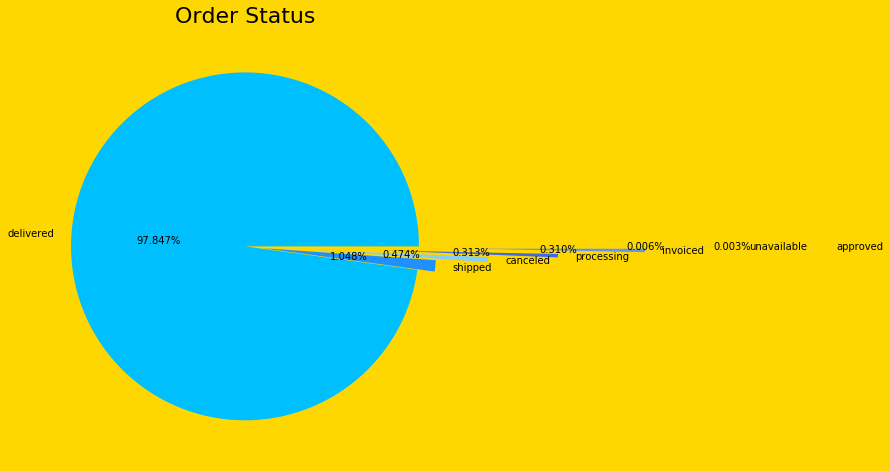

In [119]:
vc = master_df['order_status'].value_counts()
labels = vc.index
explode = (0, 0.1, .4 , .8, 1.3, 1.8, 2.3)

plt.figure(figsize=(8,8), facecolor='gold')
colors = ['deepskyblue', 'dodgerblue', 'lightskyblue', 'royalblue', 'cornflowerblue']
plt.pie(master_df['order_status'].value_counts(), explode=explode, labels=labels, colors=colors, autopct='%1.3f%%', pctdistance=.5)
plt.title('Order Status', fontsize=22)
plt.show()

In [120]:
avg_days_by_state = master_df.groupby(['customer_state'])['delivery_days'].mean().sort_values()

In [121]:
master_df.groupby(['customer_state'])['delivery_days'].mean().sort_values(ascending=False)

customer_state
RR    24.488472
AP    24.468720
AM    23.731019
AL    20.940974
PA    20.277776
MA    17.875298
SE    17.782708
CE    17.433648
AC    17.254193
PB    17.065013
RO    16.922718
PI    16.087109
RN    15.908887
BA    15.831823
PE    15.027198
MT    14.758027
TO    13.569420
MS    12.280560
ES    12.209090
GO    12.199667
RS    11.935000
RJ    11.831369
SC    11.569784
DF     9.667888
MG     8.719358
PR     8.650334
SP     5.541131
Name: delivery_days, dtype: float64

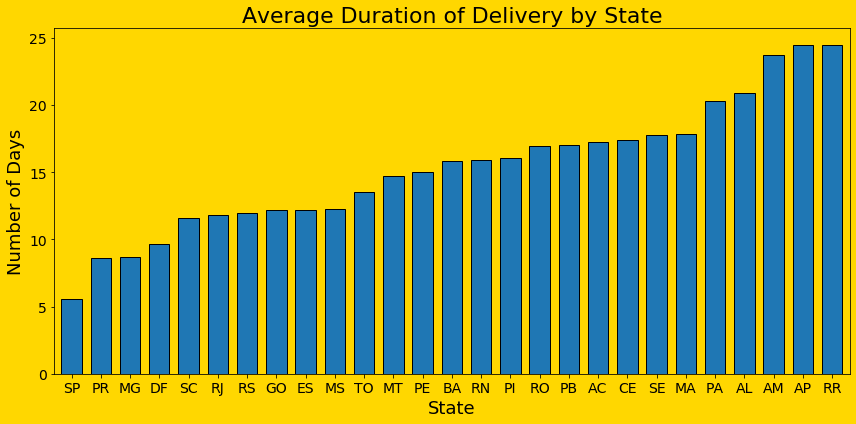

In [195]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
avg_days_by_state.plot(kind='bar', width=0.7, edgecolor='k')
plt.xlabel('State', fontsize=18)
plt.ylabel('Number of Days', fontsize=18)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.title('Average Duration of Delivery by State', fontsize=22)
plt.tight_layout()
plt.show()

In [123]:
med_days_by_state = master_df.groupby(['customer_state'])['delivery_days'].median().sort_values()

In [124]:
master_df.groupby(['customer_state'])['delivery_days'].median().sort_values(ascending=False)

customer_state
AM    23.335405
RR    21.268628
AP    20.650312
AL    18.070104
PA    17.175197
MA    15.717940
RO    15.226007
AC    14.519416
SE    14.270602
CE    14.244074
PB    14.134057
BA    13.580903
PI    13.441806
RN    13.250775
MT    13.189063
PE    12.796493
TO    12.105122
MS    11.007135
GO    10.818900
RS     9.947639
ES     9.877135
SC     9.346250
RJ     8.305804
DF     8.002975
MG     7.191302
PR     7.094537
SP     4.345145
Name: delivery_days, dtype: float64

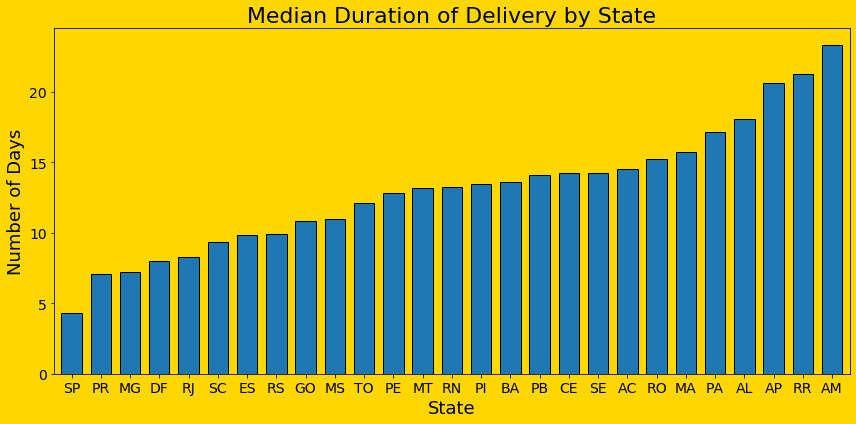

In [196]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
med_days_by_state.plot(kind='bar', width=0.7, edgecolor='k')
plt.xlabel('State', fontsize=18)
plt.ylabel('Number of Days', fontsize=18)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.title('Median Duration of Delivery by State', fontsize=22)
plt.tight_layout()
plt.show()

In [126]:
master_df['delivery_hours'].value_counts(bins=[0,50,100,200,400,800,1600,2000]).sort_index()

(-0.001, 50.0]      13498
(50.0, 100.0]       16079
(100.0, 200.0]      39584
(200.0, 400.0]      30098
(400.0, 800.0]      11812
(800.0, 1600.0]      2091
(1600.0, 2000.0]       82
Name: delivery_hours, dtype: int64

In [127]:
master_df['delivery_days'].value_counts(bins=
                                        [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]).sort_index()

(-0.001, 5.0]    35062
(5.0, 10.0]      41927
(10.0, 15.0]     19125
(15.0, 20.0]      7740
(20.0, 25.0]      4360
(25.0, 30.0]      2101
(30.0, 35.0]      1119
(35.0, 40.0]       708
(40.0, 45.0]       460
(45.0, 50.0]       247
(50.0, 55.0]       147
(55.0, 60.0]        93
(60.0, 65.0]        55
(65.0, 70.0]        47
(70.0, 75.0]        30
(75.0, 80.0]        18
(80.0, 85.0]        13
(85.0, 90.0]         3
(90.0, 95.0]         7
(95.0, 100.0]        9
Name: delivery_days, dtype: int64

In [194]:
master_df.groupby(['customer_state']).agg({'delivery_days':['min','max']})

delivery_days            
                         min         max
customer_state                          
AC                  6.282616   70.079815
AL                  2.715150   87.378692
AM                  2.852187  138.284780
AP                  4.013727  182.337674
BA                  0.250613  167.009502
CE                  0.000000  166.988877
DF                  0.773461   56.921771
ES                  0.916331  195.033947
GO                  0.730301  178.930567
MA                  0.716400  162.939954
MG                  0.000000  182.100000
MS                  0.000012   56.494097
MT                  1.630903   73.084583
PA                  2.334942  188.092153
PB                  2.908160   98.850313
PE                  0.377616  165.153102
PI                  1.076898  190.235590
PR                  0.000012   92.413021
RJ                  0.000000  205.190972
RN                  0.328773  172.956597
RO                  5.060162   44.587303
RR                  3.000000  169.158900
RS                  0.305463  181.989757
SC                  0.573218   97.357269
SE                  2.020694  194.213009
SP                  0.000000  186.400162
TO                  3.078241   55.000625

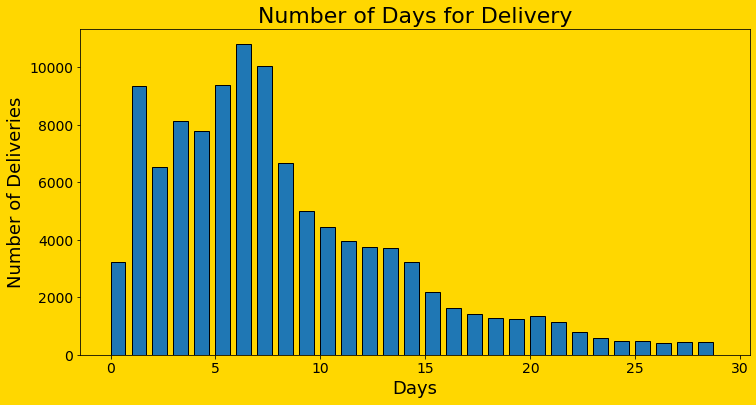

In [199]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
plt.hist(master_df['delivery_days'], bins=range(0,30), width=0.7, edgecolor='k')
plt.xlabel('Days', fontsize=18)
plt.ylabel('Number of Deliveries', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Number of Days for Delivery', fontsize=22)
plt.show()

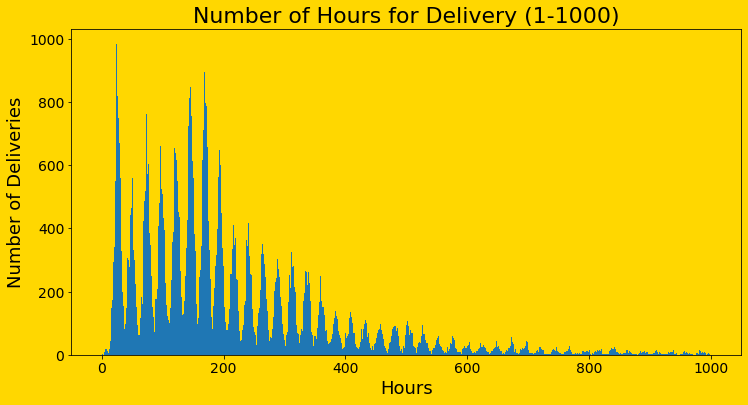

In [201]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
plt.hist(master_df['delivery_hours'], bins=range(0,1000))
plt.xlabel('Hours', fontsize=18)
plt.ylabel('Number of Deliveries', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Number of Hours for Delivery (1-1000)', fontsize=22)
plt.show()

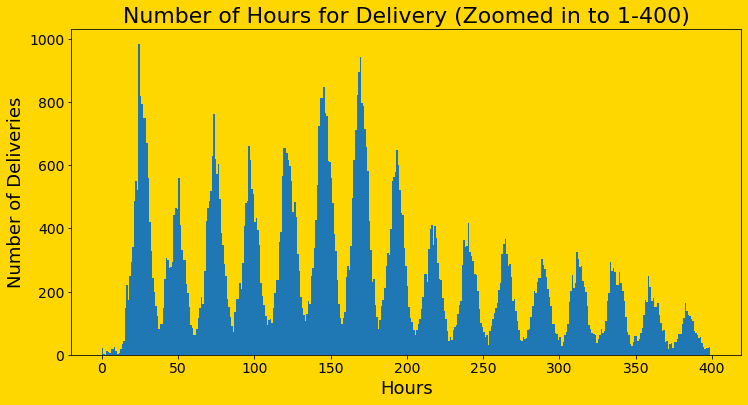

In [131]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
plt.hist(master_df['delivery_hours'], bins=range(0,400))
plt.xlabel('Hours', fontsize=18)
plt.ylabel('Number of Deliveries', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Number of Hours for Delivery (Zoomed in to 1-400)', fontsize=22)
plt.show()

In [132]:
avg_deliv_days = master_df.groupby(['order_month_year'])['delivery_days'].mean()

In [133]:
master_df.groupby(['order_month_year'])['delivery_days'].mean()

order_month_year
2016-09          NaN
2016-10     5.966325
2016-12     1.402975
2017-01     9.244999
2017-02     9.618419
2017-03     9.776192
2017-04    11.055345
2017-05     8.400310
2017-06     9.029531
2017-07     8.341359
2017-08     7.784310
2017-09     8.692214
2017-10     8.256539
2017-11    10.870688
2017-12    11.560310
2018-01    10.415781
2018-02    13.231068
2018-03    12.616248
2018-04     8.530575
2018-05     8.678321
2018-06     6.569003
2018-07     6.048522
2018-08     5.163004
2018-09          NaN
Freq: M, Name: delivery_days, dtype: float64

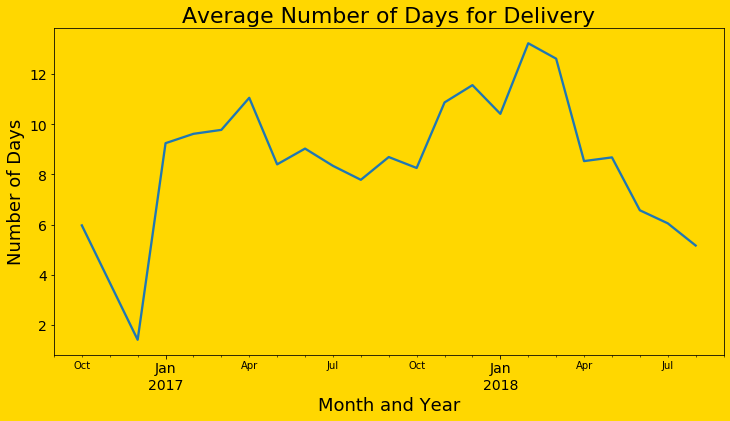

In [206]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
avg_deliv_days.plot(kind='line', linewidth=2.3)
plt.xlabel('Month and Year', fontsize=18)
plt.ylabel('Number of Days', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Average Number of Days for Delivery', fontsize=22)
plt.show()

In [135]:
median_deliv_days = master_df.groupby(['order_month_year'])['delivery_days'].median()

In [136]:
master_df.groupby(['order_month_year'])['delivery_days'].median()

order_month_year
2016-09          NaN
2016-10     3.519329
2016-12     1.402975
2017-01     7.150417
2017-02     7.637465
2017-03     6.956441
2017-04     8.880550
2017-05     7.024664
2017-06     7.314248
2017-07     7.012477
2017-08     6.829630
2017-09     7.098102
2017-10     7.008003
2017-11     8.315747
2017-12     9.046493
2018-01     8.009826
2018-02    10.930984
2018-03     9.650127
2018-04     6.805914
2018-05     6.468565
2018-06     5.514375
2018-07     5.269294
2018-08     4.907060
2018-09          NaN
Freq: M, Name: delivery_days, dtype: float64

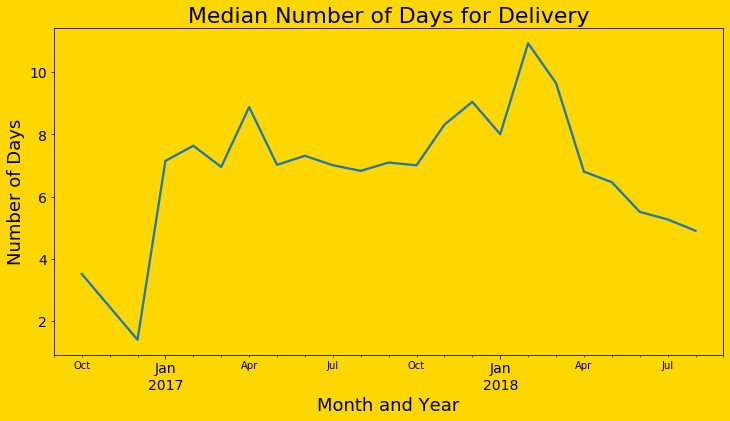

In [137]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
median_deliv_days.plot(kind='line', linewidth=2.3)
plt.xlabel('Month and Year', fontsize=18)
plt.ylabel('Number of Days', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Median Number of Days for Delivery', fontsize=22)
plt.show()

In [138]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115820 entries, 0 to 115819
Data columns (total 40 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   order_id                        115820 non-null  object         
 1   customer_id                     115820 non-null  object         
 2   order_status                    115820 non-null  object         
 3   order_purchase_timestamp        115820 non-null  datetime64[ns] 
 4   order_approved                  115820 non-null  datetime64[ns] 
 5   delivered_to_carrier            114617 non-null  datetime64[ns] 
 6   delivered_to_customer           113333 non-null  datetime64[ns] 
 7   estimated_delivery_to_customer  115820 non-null  datetime64[ns] 
 8   order_month_year                115820 non-null  period[M]      
 9   delivery_duration               113333 non-null  timedelta64[ns]
 10  delivery_hours                  113333 non-n

# Payment Behavior

In [139]:
master_df.groupby(['order_month_year'])['payment_value'].sum().sort_index()

order_month_year
2016-09        347.52
2016-10      72910.10
2016-12         19.62
2017-01     185320.62
2017-02     332265.31
2017-03     517256.51
2017-04     493438.43
2017-05     709469.44
2017-06     591674.68
2017-07     726559.23
2017-08     861096.70
2017-09    1005176.95
2017-10     991931.50
2017-11    1565721.40
2017-12    1022777.73
2018-01    1374723.23
2018-02    1288090.24
2018-03    1451515.86
2018-04    1486213.40
2018-05    1499463.18
2018-06    1294651.03
2018-07    1343682.04
2018-08    1224172.19
2018-09        166.46
Freq: M, Name: payment_value, dtype: float64

In [140]:
revenue_over_time = master_df.groupby(['order_month_year'])['payment_value'].sum().sort_index()

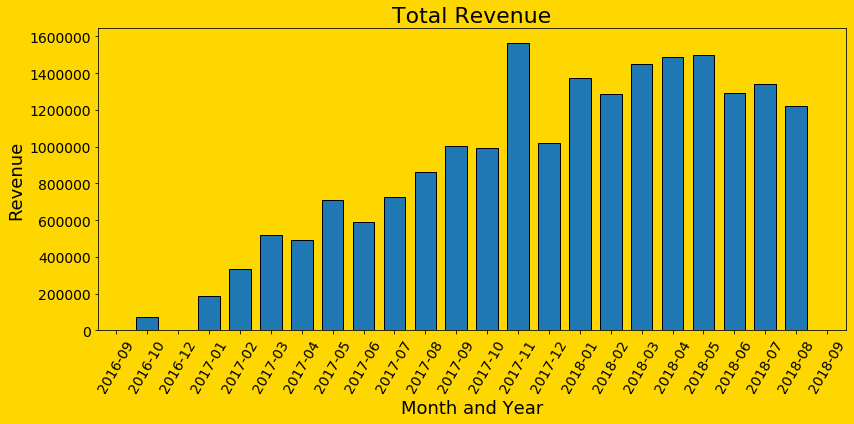

In [207]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
revenue_over_time.plot(kind='bar', width=0.7, edgecolor='k')
plt.xlabel('Month and Year', fontsize=18)
plt.ylabel('Revenue', fontsize=18)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('Total Revenue', fontsize=22)
plt.tight_layout()
plt.show()

In [142]:
avg_rev_over_time = master_df.groupby(['order_month_year'])['payment_value'].mean().sort_index()

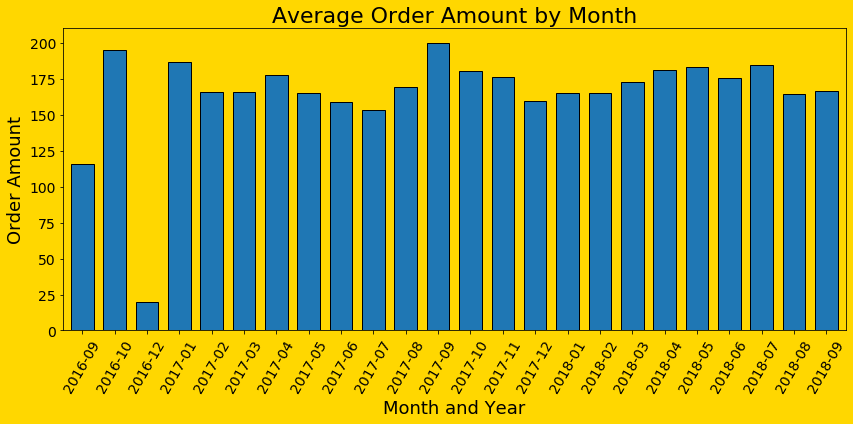

In [208]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
avg_rev_over_time.plot(kind='bar', width=0.7, edgecolor='k')
plt.xlabel('Month and Year', fontsize=18)
plt.ylabel('Order Amount', fontsize=18)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('Average Order Amount by Month', fontsize=22)
plt.tight_layout()
plt.show()

In [144]:
med_rev_over_time = master_df.groupby(['order_month_year'])['payment_value'].median().sort_index()

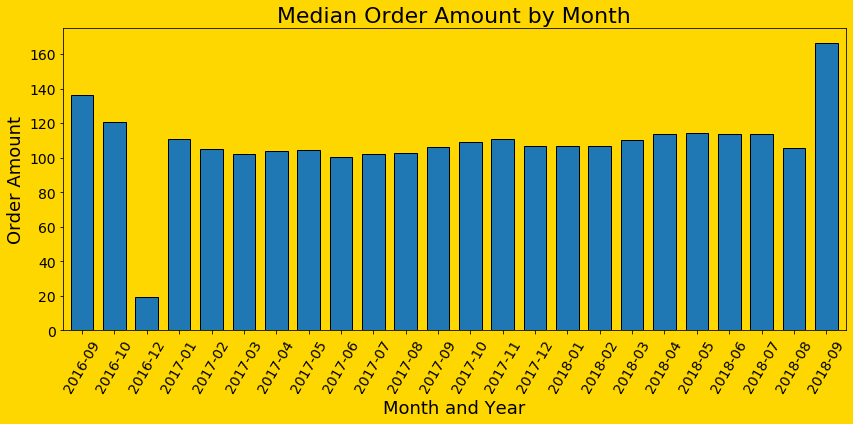

In [209]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
med_rev_over_time.plot(kind='bar', width=0.7, edgecolor='k')
plt.xlabel('Month and Year', fontsize=18)
plt.ylabel('Order Amount', fontsize=18)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('Median Order Amount by Month', fontsize=22)
plt.tight_layout()
plt.show()

In [146]:
master_df.groupby(['payment_type']).agg({
    'payment_value':['sum','mean','median','min','max','count']})

payment_value                                            
                       sum        mean  median    min       max  count
payment_type                                                          
Boleto          3997932.21  177.457153  105.67  11.62   7274.88  22529
Credit_Card    15394024.92  180.074455  115.35   0.01  13664.08  85487
Debit_Card       249120.89  150.253854   97.44  13.38   4445.50   1658
Voucher          397565.35   64.686845   40.00   0.00   1839.05   6146

In [147]:
round(master_df.groupby(['payment_type']).agg(
    {'payment_value':'sum'}).sort_values(by=
                                         'payment_value', ascending=
                                         False) / master_df['payment_value'].sum() * 100, 2).rename(
    columns={'payment_value':'pct_of_sales'})

,pct_of_sales
payment_type,
Credit_Card,76.82
Boleto,19.95
Voucher,1.98
Debit_Card,1.24


In [148]:
sales_by_FOP = master_df.groupby(['payment_type'])['payment_value'].sum().sort_values()

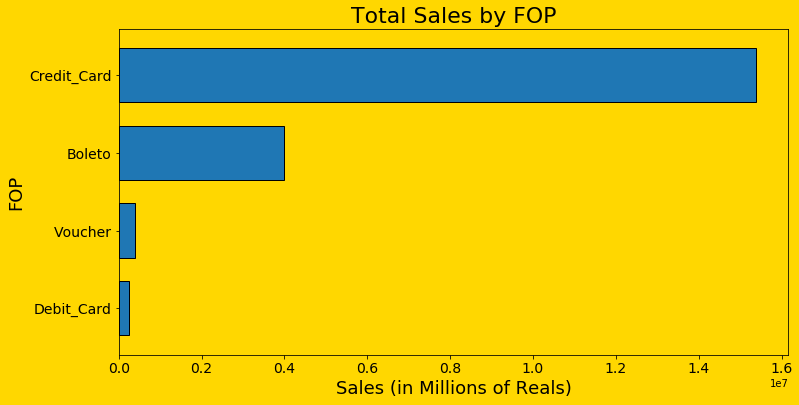

In [149]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
sales_by_FOP.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Sales (in Millions of Reals)', fontsize=18)
plt.ylabel('FOP', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Total Sales by Form of Payment (FOP)', fontsize=22)
plt.show()

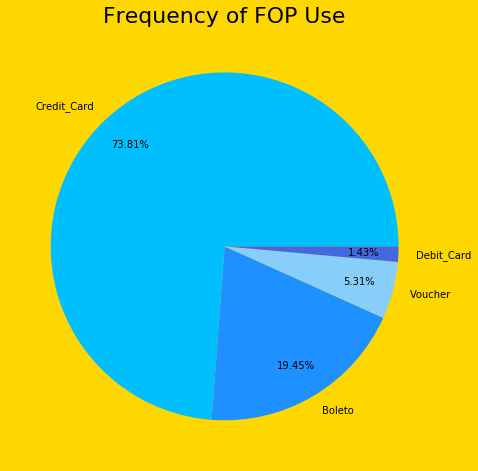

In [150]:
vc = master_df['payment_type'].value_counts()
labels = vc.index

plt.figure(figsize=(8,8), facecolor='gold')
colors = ['deepskyblue', 'dodgerblue', 'lightskyblue', 'royalblue', 'cornflowerblue']
plt.pie(master_df['payment_type'].value_counts(), labels=labels, colors=colors, autopct='%1.2f%%', pctdistance=.8)
plt.title('Frequency of FOP Use', fontsize=22)
plt.show()

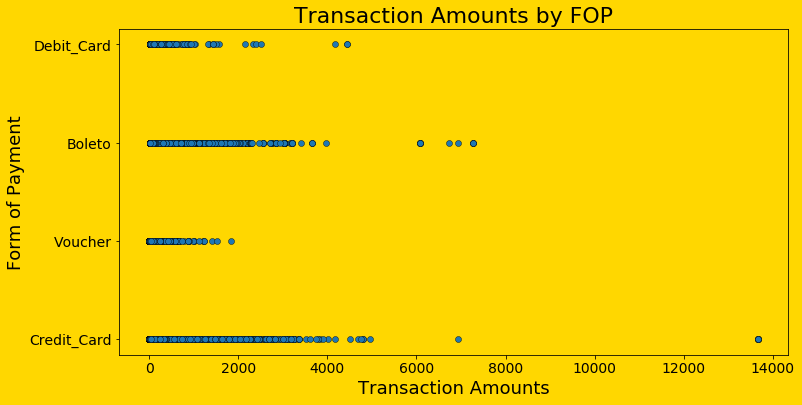

In [151]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
plt.scatter(master_df['payment_value'], master_df['payment_type'], linewidths=0.4, edgecolors='k')
plt.xlabel('Transaction Amounts', fontsize=18)
plt.ylabel('Form of Payment', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Transaction Amounts by FOP', fontsize=22)
plt.show()

In [152]:
master_df['order_month_year'].value_counts().sort_values(ascending=True).tail(10).sort_values(ascending=False)

2017-11    8883
2018-03    8406
2018-01    8324
2018-04    8182
2018-05    8166
2018-02    7797
2018-08    7424
2018-06    7366
2018-07    7272
2017-12    6414
Freq: M, Name: order_month_year, dtype: int64

In [153]:
top_10_orders = master_df['order_month_year'].value_counts().sort_values(ascending=True).tail(10)

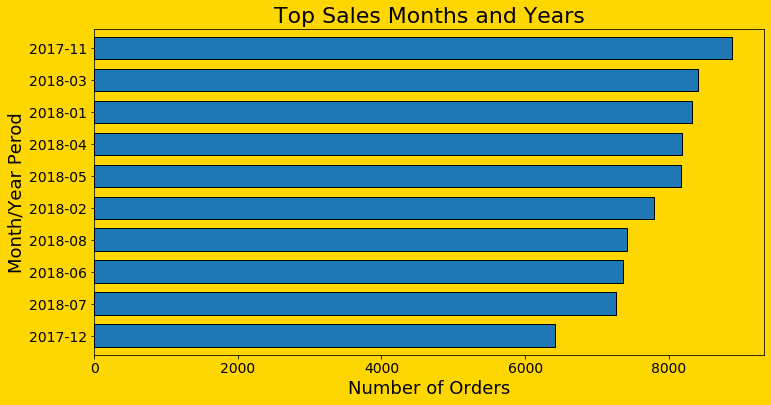

In [210]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_10_orders.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Number of Orders', fontsize=18)
plt.ylabel('Month/Year Perod', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top Sales Months and Years', fontsize=22)
plt.show()

In [156]:
top_pay_type = master_df['payment_type'].value_counts().sort_values(ascending=True)

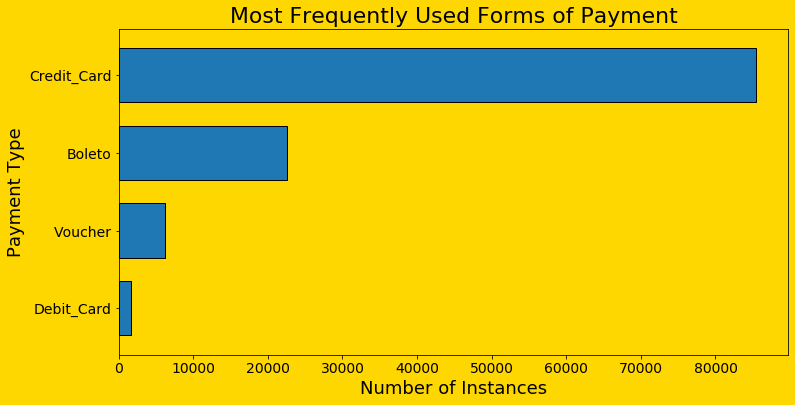

In [211]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_pay_type.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Number of Instances', fontsize=18)
plt.ylabel('Payment Type', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Most Frequently Used Forms of Payment', fontsize=22)
plt.show()

In [158]:
master_df['payment_installments'].value_counts().sort_values(ascending=False).head(10)

1     57680
2     13465
3     11578
4      7877
10     6788
5      5939
8      5005
6      4549
7      1791
9       717
Name: payment_installments, dtype: int64

In [159]:
top_pay_install = master_df['payment_installments'].value_counts().sort_values().tail(7)

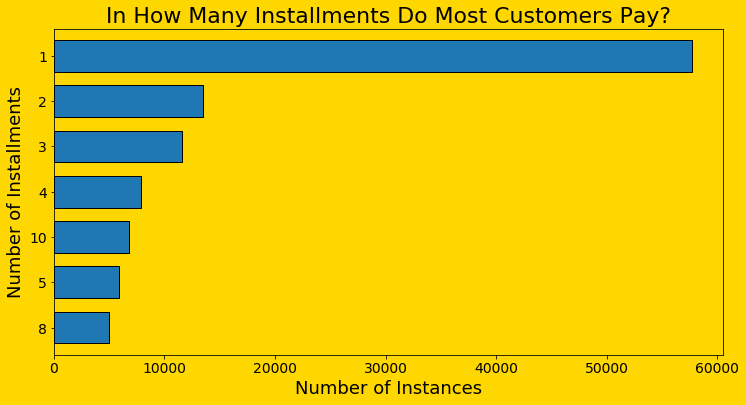

In [212]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_pay_install.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Number of Instances', fontsize=18)
plt.ylabel('Number of Installments', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('In How Many Installments Do Most Customers Pay?', fontsize=22)
plt.show()

In [161]:
master_df['payment_sequential'].value_counts().sort_values(ascending=False).head(10)

1     110885
2       3309
3        631
4        301
5        181
6        125
7         86
8         56
9         46
10        39
Name: payment_sequential, dtype: int64

In [162]:
top_pay_seq = master_df['payment_sequential'].value_counts().sort_values().tail(5)

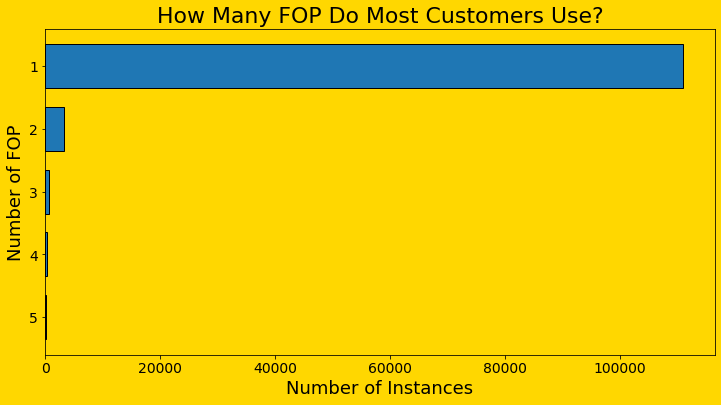

In [223]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_pay_seq.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Number of Instances', fontsize=18)
plt.ylabel('Number of FOP', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('How Many FOP Do Most Customers Use?', fontsize=22)
plt.show()

# Product Behavior

In [164]:
master_df['category_name'].value_counts().sort_values(ascending=False).head(10)

Bed_Bath_Table           11813
Health_Beauty             9970
Sports_Leisure            8943
Furniture_Decor           8731
Computers_Accessories     8080
Housewares                7346
Watches_Gifts             6200
Telephony                 4721
Garden_Tools              4572
Auto                      4378
Name: category_name, dtype: int64

In [165]:
top_prod_cat = master_df['category_name'].value_counts().sort_values(ascending=True).tail(10)

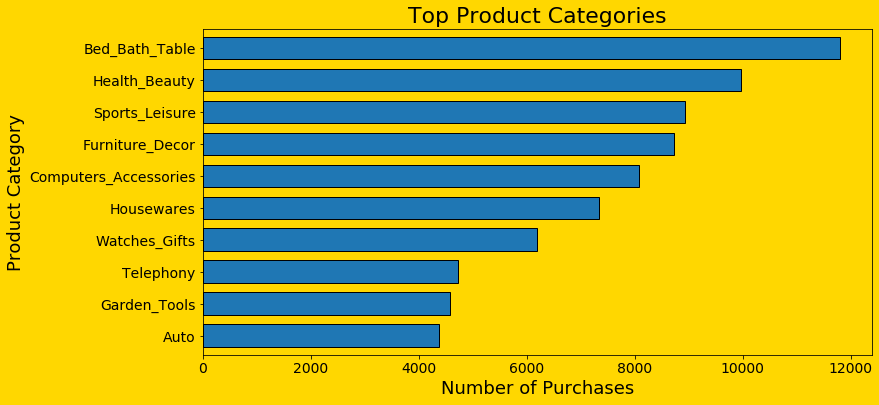

In [214]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_prod_cat.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Number of Purchases', fontsize=18)
plt.ylabel('Product Category', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top Product Categories', fontsize=22)
plt.show()

3a: [Order and Delivery Behavior](#Order-and-Delivery-Behavior)

3b: [Payment Behavior](#Payment-Behavior)

3c: [Product Behavior](#Product-Behavior)

3d: [Customer Behavior](#Customer-Behavior)

3e: [Seller Behavior](#Seller-Behavior)

In [167]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115820 entries, 0 to 115819
Data columns (total 40 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   order_id                        115820 non-null  object         
 1   customer_id                     115820 non-null  object         
 2   order_status                    115820 non-null  object         
 3   order_purchase_timestamp        115820 non-null  datetime64[ns] 
 4   order_approved                  115820 non-null  datetime64[ns] 
 5   delivered_to_carrier            114617 non-null  datetime64[ns] 
 6   delivered_to_customer           113333 non-null  datetime64[ns] 
 7   estimated_delivery_to_customer  115820 non-null  datetime64[ns] 
 8   order_month_year                115820 non-null  period[M]      
 9   delivery_duration               113333 non-null  timedelta64[ns]
 10  delivery_hours                  113333 non-n

## Customer Behavior

In [155]:
master_df['customer_city_state'].value_counts().sort_values(ascending=
                                                                       True).tail(10).sort_values(ascending=False)

Sao Paulo, SP                18267
Rio De Janeiro, RJ            8065
Belo Horizonte, MG            3187
Brasilia, DF                  2425
Curitiba, PR                  1792
Campinas, SP                  1714
Porto Alegre, RS              1626
Salvador, BA                  1488
Guarulhos, SP                 1383
Sao Bernardo Do Campo, SP     1089
Name: customer_city_state, dtype: int64

In [168]:
master_df.groupby(['customer_state']).agg({
    'payment_value':'sum'}).sort_values(by='payment_value',ascending=False).head(10)

,payment_value
customer_state,
SP,7495117.89
RJ,2735903.70
MG,2299102.47
RS,1126905.94
PR,1053724.99
BA,786125.16
SC,775148.07
GO,503539.86
DF,429150.39


In [169]:
top_10_cust_citystate = master_df['customer_city_state'].value_counts().sort_values(ascending=True).tail(10)

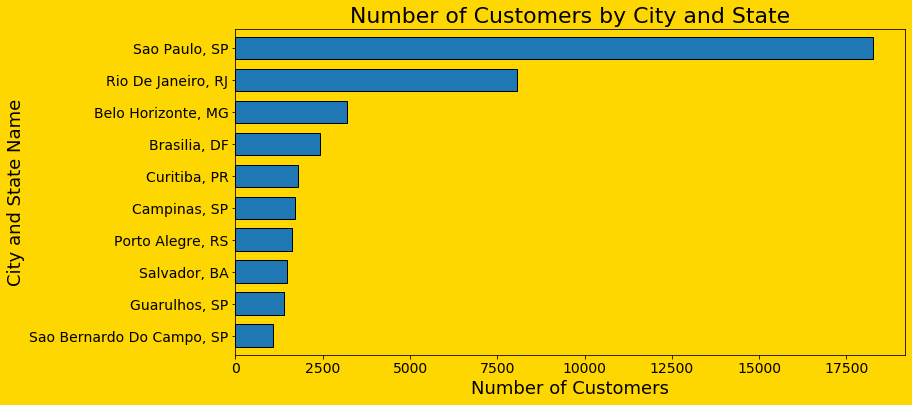

In [215]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_10_cust_citystate.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Number of Customers', fontsize=18)
plt.ylabel('City and State Name', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Number of Customers by City and State', fontsize=22)
plt.show()

In [171]:
state_payments = master_df.groupby(['customer_state'])['payment_value'].sum().sort_values().tail(7)

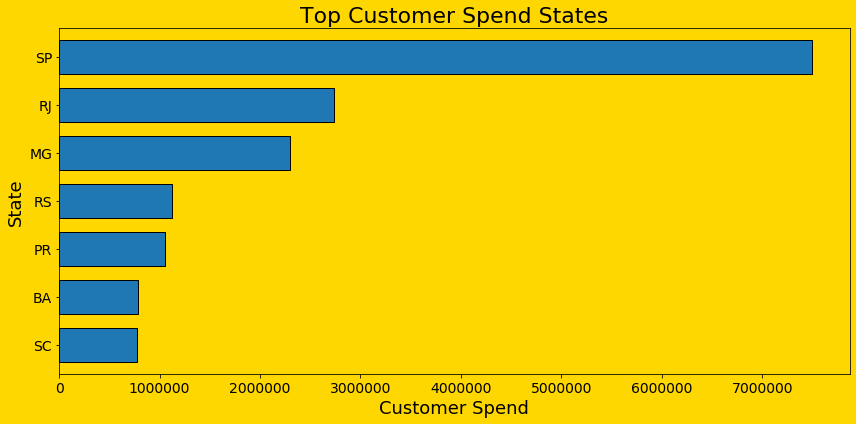

In [216]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
state_payments.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Customer Spend', fontsize=18)
plt.ylabel('State', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top Customer Spend States', fontsize=22)
plt.tight_layout()
plt.show()

In [173]:
master_df.groupby(['customer_state']).agg({
    'payment_value':'median'}).sort_values(by='payment_value',ascending=False).head(10)

,payment_value
customer_state,
AC,186.830
RR,167.240
AP,166.600
RO,158.805
PB,155.450
PI,152.875
PA,148.090
SE,144.120
RN,140.160


In [174]:
median_state_payments = master_df.groupby(['customer_state'])\
['payment_value'].median().sort_values().tail(10)

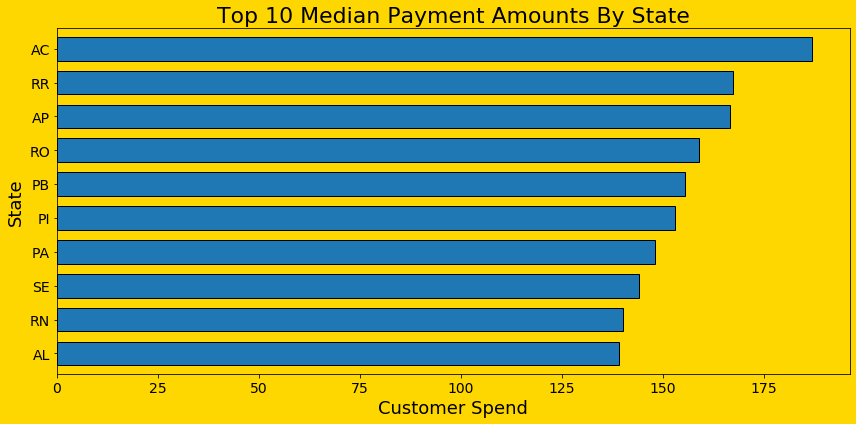

In [217]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
median_state_payments.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Customer Spend', fontsize=18)
plt.ylabel('State', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top 10 Median Payment Amounts By State', fontsize=22)
plt.tight_layout()
plt.show()

In [176]:
master_df.groupby(['customer_city', 'customer_state']).agg({
    'payment_value':'sum'}).sort_values(by='payment_value',ascending=False).head(10)

,,payment_value
customer_city,customer_state,
Sao Paulo,SP,2795540.85
Rio De Janeiro,RJ,1550270.27
Belo Horizonte,MG,493136.93
Brasilia,DF,427060.18
Curitiba,PR,326973.12
Porto Alegre,RS,311122.56
Salvador,BA,284146.03
Campinas,SP,263019.11
Goiania,GO,209340.67


In [177]:
city_state_payments = master_df.groupby(['customer_city', 'customer_state'])\
['payment_value'].sum().sort_values().tail(7)

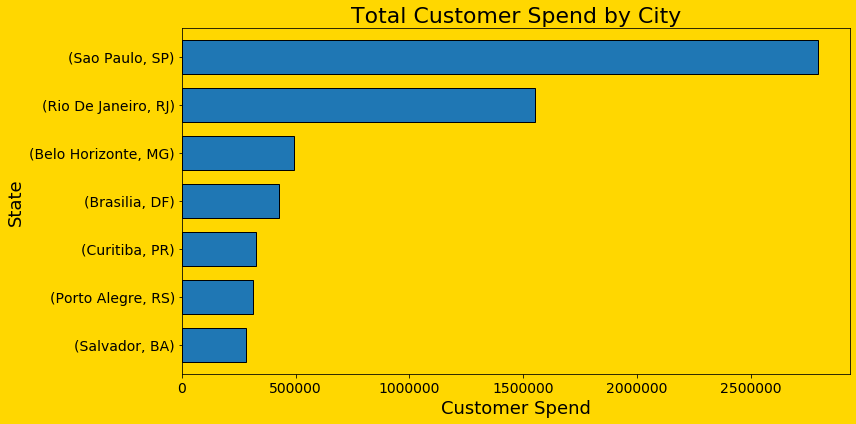

In [218]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
city_state_payments.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Customer Spend', fontsize=18)
plt.ylabel('State', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Total Customer Spend by City', fontsize=22)
plt.tight_layout()
plt.show()

In [179]:
master_df.groupby(['customer_state']).agg({
    'payment_value':'sum'}).sort_values(by='payment_value',ascending=False).head(10)

,payment_value
customer_state,
SP,7495117.89
RJ,2735903.70
MG,2299102.47
RS,1126905.94
PR,1053724.99
BA,786125.16
SC,775148.07
GO,503539.86
DF,429150.39


In [180]:
master_df['customer_city_state'].value_counts().sort_values(ascending=False).head(7)

Sao Paulo, SP         18267
Rio De Janeiro, RJ     8065
Belo Horizonte, MG     3187
Brasilia, DF           2425
Curitiba, PR           1792
Campinas, SP           1714
Porto Alegre, RS       1626
Name: customer_city_state, dtype: int64

In [181]:
most_transac = master_df['customer_city_state'].value_counts().sort_values(ascending=True).tail(7)

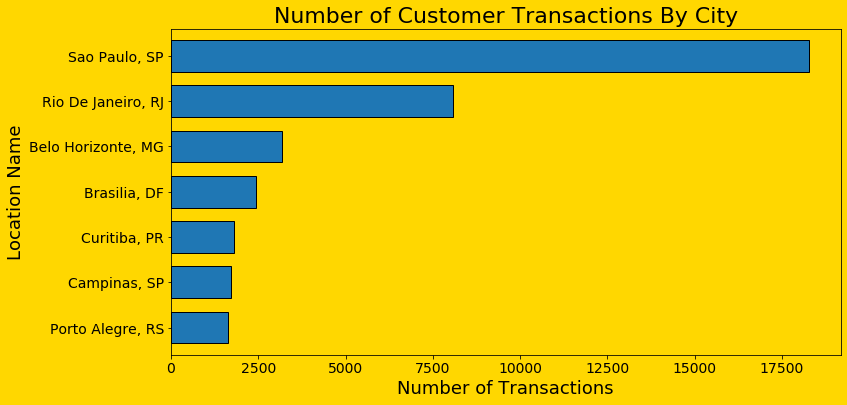

In [219]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
most_transac.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Number of Transactions', fontsize=18)
plt.ylabel('Location Name', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Number of Customer Transactions By City', fontsize=22)
plt.show()

In [183]:
master_df['customer_zip_code_prefix'].value_counts().sort_values(ascending=
                                                                 False).head(10).sort_values(ascending=False)

24220    154
22790    153
22793    151
24230    135
22775    125
35162    123
29101    119
11740    110
13087    106
36570    104
Name: customer_zip_code_prefix, dtype: int64

In [184]:
top_10_cust_zip = master_df['customer_zip_code_prefix'].value_counts().sort_values().tail(10)

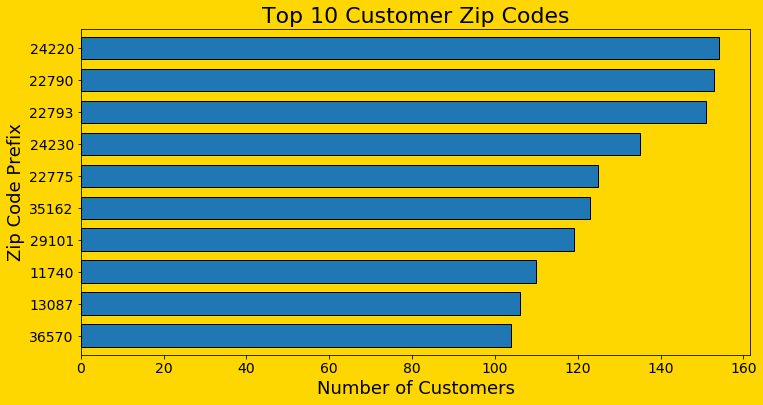

In [220]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_10_cust_zip.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Number of Customers', fontsize=18)
plt.ylabel('Zip Code Prefix', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top 10 Customer Zip Codes', fontsize=22)
plt.show()

## Seller Behavior

In [186]:
master_df['seller_city_state'].value_counts().sort_values(ascending=True).tail(10).sort_values(ascending=False)

Sao Paulo, SP                28903
Ibitinga, SP                  8194
Santo Andre, SP               3091
Curitiba, PR                  3022
Sao Jose Do Rio Preto, SP     2676
Belo Horizonte, MG            2464
Rio De Janeiro, RJ            2452
Ribeirao Preto, SP            2339
Maringa, PR                   2257
Guarulhos, SP                 2050
Name: seller_city_state, dtype: int64

In [187]:
top_10_sell_city = master_df['seller_city_state'].value_counts().sort_values(ascending=True).tail(7)

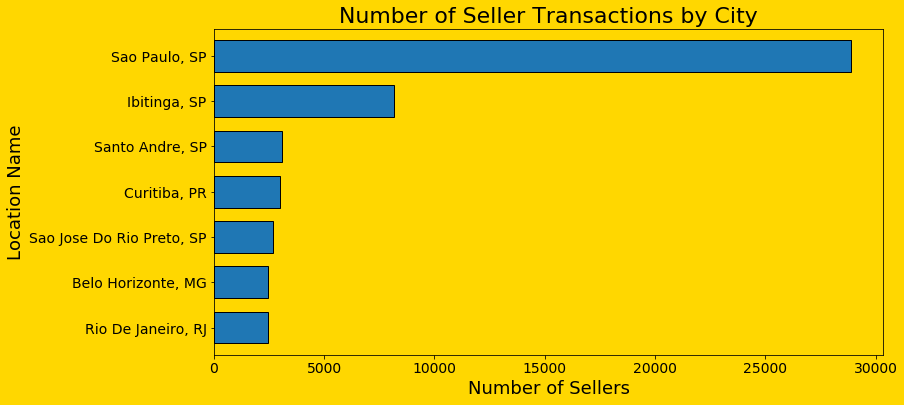

In [221]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_10_sell_city.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Number of Sellers', fontsize=18)
plt.ylabel('Location Name', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Number of Seller Transactions by City', fontsize=22)
plt.show()

In [189]:
master_df['seller_zip_code_prefix'].value_counts().sort_values(ascending=True).tail(10).sort_values(ascending=False)

14940    8194
5849     2137
15025    2089
9015     1853
13405    1642
4782     1547
8577     1544
3204     1462
4160     1267
13232    1254
Name: seller_zip_code_prefix, dtype: int64

In [190]:
top_10_sell_zip = master_df['seller_zip_code_prefix'].value_counts().sort_values(ascending=True).tail(10)

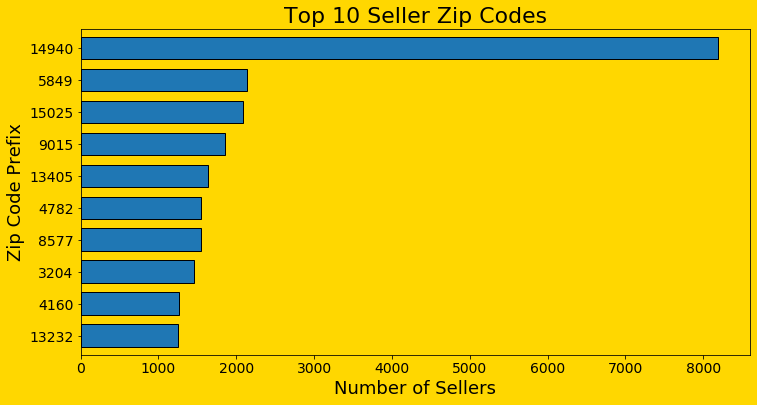

In [222]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_10_sell_zip.plot(kind='barh', width=0.7, edgecolor='k')
plt.xlabel('Number of Sellers', fontsize=18)
plt.ylabel('Zip Code Prefix', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top 10 Seller Zip Codes', fontsize=22)
plt.show()

3a: [Order and Delivery Behavior](#Order-and-Delivery-Behavior)

3b: [Payment Behavior](#Payment-Behavior)

3c: [Product Behavior](#Product-Behavior)

3d: [Customer Behavior](#Customer-Behavior)

3e: [Seller Behavior](#Seller-Behavior)